# Setup

In [683]:
# load required packages 
import itertools
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

import ixmp as ix
import message_ix

from message_ix.utils import make_df

In [684]:
import xlwings as xw

In [685]:
# launch the IX modeling platform using the local default database                                                                                                                       
mp = ix.Platform()

In [686]:
model = "Sustainable seaborne trade"
scen = "baseline"
annot = "develope a model for CO2 global shipping emissions" 

scenario = message_ix.Scenario(mp, model, scen, version='new', annotation=annot)

In [687]:
mp.units()

['gCO2/g',
 'USD/kWa',
 'tC',
 'T$',
 'USD/km',
 'USD/kg',
 'kg',
 'kWh',
 '???',
 'USD/t',
 'USD/GWa',
 'km',
 'cases',
 '%',
 'USD/tC',
 'USD/tCO2',
 'USD',
 'tCO2',
 'MW',
 '€/t',
 '-',
 'GWa',
 'GW',
 't',
 'MWa',
 'ton-nm',
 'y',
 'kg/kWa',
 'G$',
 'kWh/kg']

# Time and Spatial Detail



In [688]:
horizon = range(2015,2051,1)
scenario.add_horizon({'year': horizon})

In [689]:
country = 'World'
scenario.add_spatial_sets({'country': country})

# Model structure

In [690]:
#transport_work = ["containers_TW", "drybulks_TW", "chemicaltankers_TW", "oiltankers_TW"]
scenario.add_set("commodity", "transport_work")
scenario.add_set("level", "useful")
scenario.add_set("mode", "standard")

# Economic parameters

In [691]:
scenario.add_par("interestrate",  horizon, value=0.05, unit='-')

# Technologies

In [692]:
#fuel technologies
fuel_tec= ["HFO", "MDO", "LNG", "H2", "NH3", "BioMEOH"]
scenario.add_set("technology", fuel_tec)

# Demand

In [693]:
data=pd.read_excel (r'/Users/annaspedo/message/risultati_energy_cn2.xlsx')
dem=pd.DataFrame(data, columns= ['SSP1','SSP2','SSP3','SSP4','SSP5'])


In [694]:
TW_demand = pd.DataFrame({
        'node': country,
        'commodity': 'transport_work',
        'level': 'useful',
        'year': horizon,
        'time': 'year',
        'value': dem.SSP2, 
        'unit': 'kWh',
    })
scenario.add_par("demand", TW_demand)
scenario.par('demand')


,node,commodity,level,year,time,value,unit
0,World,transport_work,useful,2015,year,1.348889e+12,kWh
1,World,transport_work,useful,2016,year,1.400439e+12,kWh
2,World,transport_work,useful,2017,year,1.452020e+12,kWh
3,World,transport_work,useful,2018,year,1.588773e+12,kWh
4,World,transport_work,useful,2019,year,1.616847e+12,kWh
5,World,transport_work,useful,2020,year,1.649949e+12,kWh
6,World,transport_work,useful,2021,year,1.688893e+12,kWh
7,World,transport_work,useful,2022,year,1.734547e+12,kWh
8,World,transport_work,useful,2023,year,1.787807e+12,kWh
9,World,transport_work,useful,2024,year,1.849541e+12,kWh


# Engineering parameters

In [695]:
year_df = scenario.vintage_and_active_years()
vintage_years, act_years = year_df['year_vtg'], year_df['year_act']

In [696]:
base_output = {
    'node_loc': country,
    'year_vtg': vintage_years,
    'year_act': act_years,
    'mode': 'standard',
    'node_dest': country,
    'time': 'year',
    'time_dest': 'year', 
    'unit': '-',
}

#HFO OUTPUT
HFO = make_df(base_output, technology='HFO', commodity='transport_work', 
                  level='useful', value=1.)
scenario.add_par('output', HFO)

#MDO OUTPUT
MDO = make_df(base_output, technology='MDO', commodity='transport_work', 
                 level='useful', value=1.)
scenario.add_par('output', MDO)

#LNG OUTPUT
LNG = make_df(base_output, technology='LNG', commodity='transport_work', 
                  level='useful', value=1.)
scenario.add_par('output', LNG)

#H2 OUTPUT
H2 = make_df(base_output, technology='H2', commodity='transport_work', 
                  level='useful', value=1.)
scenario.add_par('output', H2)

#NH3 OUTPUT
NH3 = make_df(base_output, technology='NH3', commodity='transport_work', 
                  level='useful', value=1.)
scenario.add_par('output', NH3)

#BIO OUTPUT
BioMEOH = make_df(base_output, technology='BioMEOH', commodity='transport_work', 
                  level='useful', value=1.)
scenario.add_par('output', BioMEOH)

###
#scenario.par("output")

In [697]:
#capacity factor

cap_fac= {
    'HFO':5.41,
    'MDO':5.71,
    'LNG':6.41,
    'H2':17.98,
    'NH3':2.79,
    'BioMEOH':2.64
}


base_capacity_factor = {
    'node_loc': country,
    'year_vtg': vintage_years,
    'year_act': act_years,
    'time': 'year',
    'unit': 'kWh/kg',
}

for tec, val in cap_fac.items():
    df = make_df(base_capacity_factor, technology=tec, value=val)        
    scenario.add_par('capacity_factor', df)

#scenario.par("capacity_factor")

# Technoeconomic Parameters

In [698]:
#FUEL COSTS

var_cost={
    'HFO': 300,
    'MDO': 304, #messo io a caso
    'LNG': 590,
    'BioMEOH': 800,
    'H2': 3300,
    'NH3': 660
}

base_var_cost = {
    'node_loc': country,
    'year_vtg': vintage_years,
    'year_act': act_years,
    'mode': 'standard',
    'time': 'year',
    'unit': 'USD/t',
}

for tec, val in var_cost.items():
    df = make_df(base_var_cost, technology=tec, value=val)
    scenario.add_par('var_cost', df)

# Bounds

In [699]:
 #INITIAL ACTIVITY IN YEARS 2015-2018 - UPPER

activity= {
    'HFO':1.26E+12, #79% of total energy content IMO4
    'MDO': 3.18E+11, #20% of total energy content IMO4
    'LNG': 1.60E+10, #1% of total energy content in 2018 IMO4 
   'BioMEOH':0,
    'H2':0,
    'NH3':0
}
base_activity = {
    'node_loc': country,
    'year_act': horizon[0:4],
    'mode': 'standard',
    'time': 'year',
    'unit': 'kWh',
}
for tec, val in activity.items():
    df = make_df(base_activity, technology=tec, value=val )
    scenario.add_par('bound_activity_up', df)
    

In [700]:
 #INITIAL ACTIVITY IN YEARS 2015-2018 - LOWER
activity= {
    'HFO':1.06E+12, #79% of total energy content IMO4
    'MDO': 2.68E+11, #20% of total energy content IMO4
    'LNG': 1.34E+10, #1% of total energy content in 2018 IMO4 
    'BioMEOH':0,
    'H2':0,
    'NH3':0
}
base_activity = {
    'node_loc': country,
    'year_act': horizon[0:4],
    'mode': 'standard',
    'time': 'year',
    'unit': 'kWh',
}
for tec, val in activity.items():
    df = make_df(base_activity, technology=tec, value=val )
scenario.add_par('bound_activity_lo', df)   

In [701]:
# NEW ACTIVITY IN YEARS 2018-2050 FOSSILS - UPPER

activity= {
    'HFO': 1.50E+12
}
base_activity = {
    'node_loc': country,
    'year_act': horizon[5:],
    'mode': 'standard',
    'time': 'year',
    'unit': 'kWh',
}
for tec, val in activity.items():
    df = make_df(base_activity, technology=tec, value=val )
    scenario.add_par('bound_activity_up', df)
    

In [702]:
# NEW ACTIVITY IN YEARS 2018-2050 FOSSILS - UPPER

activity= {
    'HFO': 2.0E+12,
    'MDO':  4.0E+11,
}
base_activity = {
    'node_loc': country,
    'year_act': horizon[12:],
    'mode': 'standard',
    'time': 'year',
    'unit': 'kWh',
}
for tec, val in activity.items():
    df = make_df(base_activity, technology=tec, value=val )
    scenario.add_par('bound_activity_up', df)
    

In [703]:
activity= {
    'MDO':  2.0E+11,
}
base_activity = {
    'node_loc': country,
    'year_act': horizon[4:23],
    'mode': 'standard',
    'time': 'year',
    'unit': 'kWh',
}
for tec, val in activity.items():
    df = make_df(base_activity, technology=tec, value=val )
    scenario.add_par('bound_activity_lo', df)

In [704]:
# NEW ACTIVITY IN YEARS 2018-2050 ZERO.FUELS - LOWER

activity= {
    'H2': 8.40E+8,
    'NH3':  8.40E+8,
    'BioMEOH': 8.40E+8
}
base_activity = {
    'node_loc': country,
    'year_act': horizon[5:],
    'mode': 'standard',
    'time': 'year',
    'unit': 'kWh',
}
for tec, val in activity.items():
    df = make_df(base_activity, technology=tec, value=val )
    scenario.add_par('bound_activity_lo', df)

In [705]:
# NEW ACTIVITY IN YEARS 2030-2050 ZERO.FUELS - LOWER

activity= {
    'H2': 1.21E+10,
    'NH3':  1.21E+10,
    'BioMEOH': 5.33E+11
}
base_activity = {
    'node_loc': country,
    'year_act': horizon[16:],
    'mode': 'standard',
    'time': 'year',
    'unit': 'kWh',
}
for tec, val in activity.items():
    df = make_df(base_activity, technology=tec, value=val )
    scenario.add_par('bound_activity_lo', df)

In [706]:
# NEW ACTIVITY IN YEARS 2030-2050 ZERO.FUELS - LOWER

activity= {
    'LNG': 1.87E+12,
    'H2': 1.4E+12,
    'NH3':  1.4E+12,
    'BioMEOH': 1.4E+12
}
base_activity = {
    'node_loc': country,
    'year_act': horizon[16:],
    'mode': 'standard',
    'time': 'year',
    'unit': 'kWh',
}
for tec, val in activity.items():
    df = make_df(base_activity, technology=tec, value=val )
    scenario.add_par('bound_activity_up', df)

In [707]:
growth_activity= {
    'LNG':0.15,
    'H2': 0.3,
    'NH3': 0.3,
    'BioMEOH': 0.9
}

base_ZERO = {
    'node_loc': country,
    'year_act': horizon[6:15],
    'time': 'year',
    'unit': '%',
}

for tec, val in growth_activity.items():
    df = make_df(base_ZERO, technology=tec, value=val)
    scenario.add_par('growth_activity_lo', df)

In [708]:
growth_activity= {
    'H2': 0.26,
    'NH3': 0.26,
    'BioMEOH': 0.047
}

base_ZERO = {
    'node_loc': country,
    'year_act': horizon[15:],
    'time': 'year',
    'unit': '%',
}

for tec, val in growth_activity.items():
    df = make_df(base_ZERO, technology=tec, value=val)
    scenario.add_par('growth_activity_lo', df)

In [709]:
growth_activity= {
    'LNG': 0.2,
    
}

base_ZERO = {
    'node_loc': country,
    'year_act': horizon[6:17],
    'time': 'year',
    'unit': '%',
}

for tec, val in growth_activity.items():
    df = make_df(base_ZERO, technology=tec, value=val)
    scenario.add_par('growth_activity_up', df)

In [710]:
growth_activity= {
    'LNG': 0
}

base_ZERO = {
    'node_loc': country,
    'year_act': horizon[15:],
    'time': 'year',
    'unit': '%',
}

for tec, val in growth_activity.items():
    df = make_df(base_ZERO, technology=tec, value=val)
    scenario.add_par('growth_activity_up', df)

In [711]:
growth_activity= {
    'HFO': -0.01 
}

base_ZERO = {
    'node_loc': country,
    'year_act': horizon[5:],
    'time': 'year',
    'unit': '%',
}

for tec, val in growth_activity.items():
    df = make_df(base_ZERO, technology=tec, value=val)
    scenario.add_par('growth_activity_up', df)

# Emissions parameter

In [712]:
scenario.add_set("emission", "CO2eq")

base_emissions = {
    'node_loc': country,
    'year_vtg': vintage_years,
    'year_act': act_years,
    'mode': 'standard',
    'unit': 'gCO2/g',  #actually is CO2-eq
}


emissions = {
    'HFO': 3.58,
    'MDO': 3.34,
    'LNG': 4.72,
    'BioMEOH': 2.03,
    'H2': 10.38,
    'NH3': 0.23,
    }

for tec,val in emissions.items():
    df = make_df(base_emissions, technology=tec, emission='CO2eq', value=val)
    scenario.add_par('emission_factor', df)

# Commit the datastructure and solve the model

In [713]:
comment = 'baseline scenario for international trade CO2 emissions'
scenario.commit(comment)
scenario.set_as_default()

In [714]:
scenario.solve()

In [715]:
scenario.var('OBJ')['lvl']
scenario.var('ACT')['lvl']


0      1.260000e+12
1      1.260000e+12
2      1.260000e+12
3      1.260000e+12
4      1.515152e+12
           ...     
211    1.165041e+12
212    1.219798e+12
213    1.277129e+12
214    1.337154e+12
215    1.400000e+12
Name: lvl, Length: 216, dtype: float64

In [716]:
act=pd.DataFrame(data=scenario.var('ACT'),index=None)
emi=pd.DataFrame(data=scenario.var('EMISS'),index=None)

In [717]:
from tools import Plots
p = Plots(scenario, country)

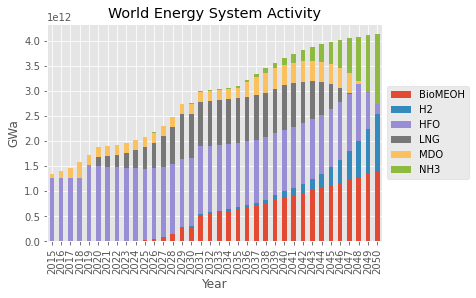

In [718]:
p.plot_activity(baseyear=True)

In [719]:
with pd.ExcelWriter(r'/Users/annaspedo/message/RESULTS_SSP2_SEN_LO20.xlsx') as writer:
    act.to_excel(writer, sheet_name='SSP2_activity_SEN_LO20')
    emi.to_excel(writer, sheet_name='SSP2_emissions_SEN_LO20')